# Lab Assignment: K-Nearest Neighbors (KNN) Classifier
#### Step 1: Import libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Step 2: Load dataset

In [41]:
iris = load_iris()
X = iris.data
y = iris.target

#### Step 3: Train-test split (90% train, 10% test)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### Step 4: Feature Scaling

In [104]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Step 5: Train KNN model for different K values

In [105]:
accuracies = {}
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[k] = acc
    print(f"K={k}, Accuracy={acc:.2f}")

K=1, Accuracy=0.97
K=2, Accuracy=0.93
K=3, Accuracy=0.93
K=4, Accuracy=0.93
K=5, Accuracy=0.93
K=6, Accuracy=0.93
K=7, Accuracy=0.97
K=8, Accuracy=0.93
K=9, Accuracy=0.97
K=10, Accuracy=0.97


#### Step 6: Choose best K

In [106]:
best_k = max(accuracies, key=accuracies.get)
print(f"\nBest K = {best_k}, Accuracy = {accuracies[best_k]:.2f}")


Best K = 1, Accuracy = 0.97


#### Step 7: Evaluate with confusion matrix & classification report

In [107]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

In [108]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=iris.target_names))


Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### Step 8: Visualization of Accuracy vs K

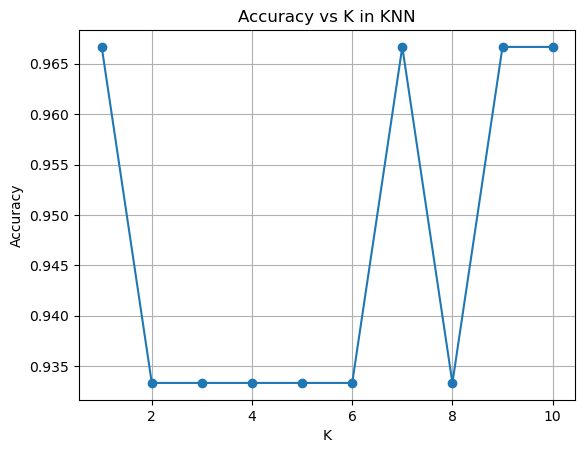

In [109]:
plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K in KNN")
plt.grid(True)
plt.show()